In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv(r'walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
df.shape

(550068, 10)

In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [8]:
df.groupby('Gender')['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [10]:
for i in ['Gender','Age','City_Category','Stay_In_Current_City_Years','Marital_Status']:
    print(df[i].value_counts()/len(df))
    print('')

M    0.753105
F    0.246895
Name: Gender, dtype: float64

26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: Age, dtype: float64

B    0.420263
C    0.311189
A    0.268549
Name: City_Category, dtype: float64

1     0.352358
2     0.185137
3     0.173224
4+    0.154028
0     0.135252
Name: Stay_In_Current_City_Years, dtype: float64

0    0.590347
1    0.409653
Name: Marital_Status, dtype: float64



### Insight

##### Walmart has 75% male customer and 25% female customer
##### 40% customers are between age 26 to 35
##### 42% sales are happening in city B

In [11]:
for i in ['Gender','Age','City_Category','Stay_In_Current_City_Years','Marital_Status']:
    print(df.groupby(i)['Purchase'].sum()/df['Purchase'].sum())
    print('           ')

Gender
F    0.232786
M    0.767214
Name: Purchase, dtype: float64
           
Age
0-17     0.026475
18-25    0.179333
26-35    0.398714
36-45    0.201454
46-50    0.082586
51-55    0.072039
55+      0.039398
Name: Purchase, dtype: float64
           
City_Category
A    0.258344
B    0.415151
C    0.326505
Name: Purchase, dtype: float64
           
Stay_In_Current_City_Years
0     0.134028
1     0.351832
2     0.186265
3     0.173653
4+    0.154222
Name: Purchase, dtype: float64
           
Marital_Status
0    0.590471
1    0.409529
Name: Purchase, dtype: float64
           


<Axes: xlabel='Gender', ylabel='Purchase'>

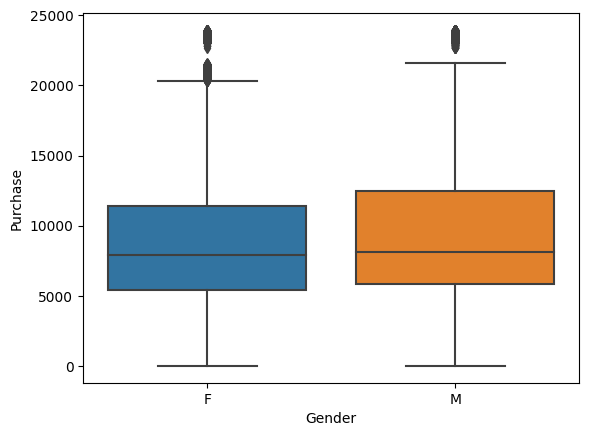

In [12]:
sns.boxplot(data=df,y='Purchase',x='Gender')

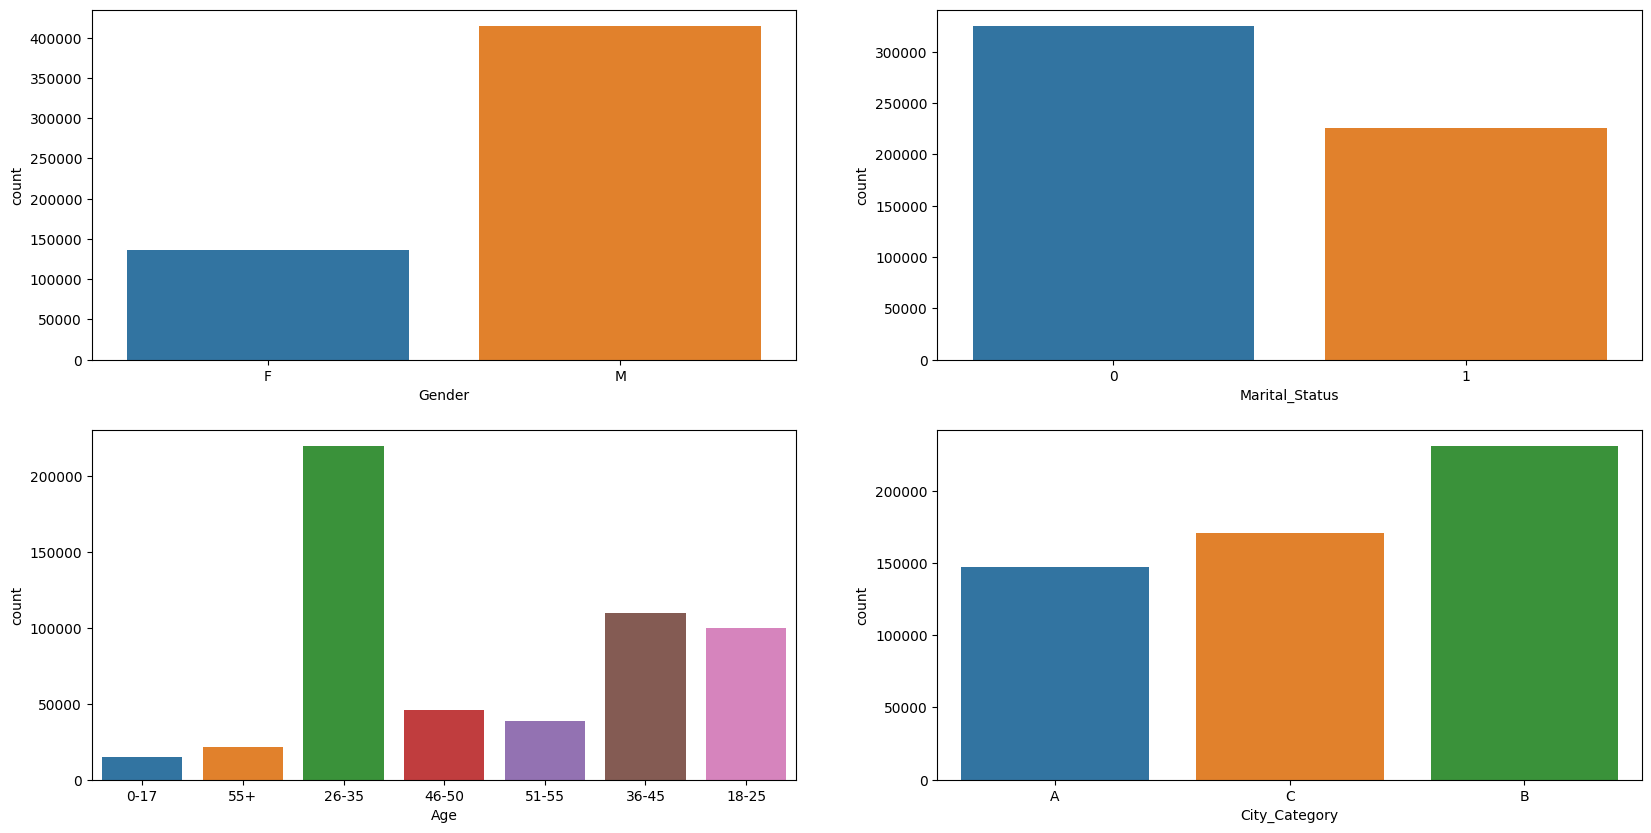

In [13]:
f,ax=plt.subplots(2,2,figsize=(20,10))
sns.countplot(ax=ax[0,0],data=df,x='Gender')
sns.countplot(ax=ax[0,1],data=df,x='Marital_Status')
sns.countplot(ax=ax[1,0],data=df,x='Age')
sns.countplot(ax=ax[1,1],data=df,x='City_Category')
plt.show()

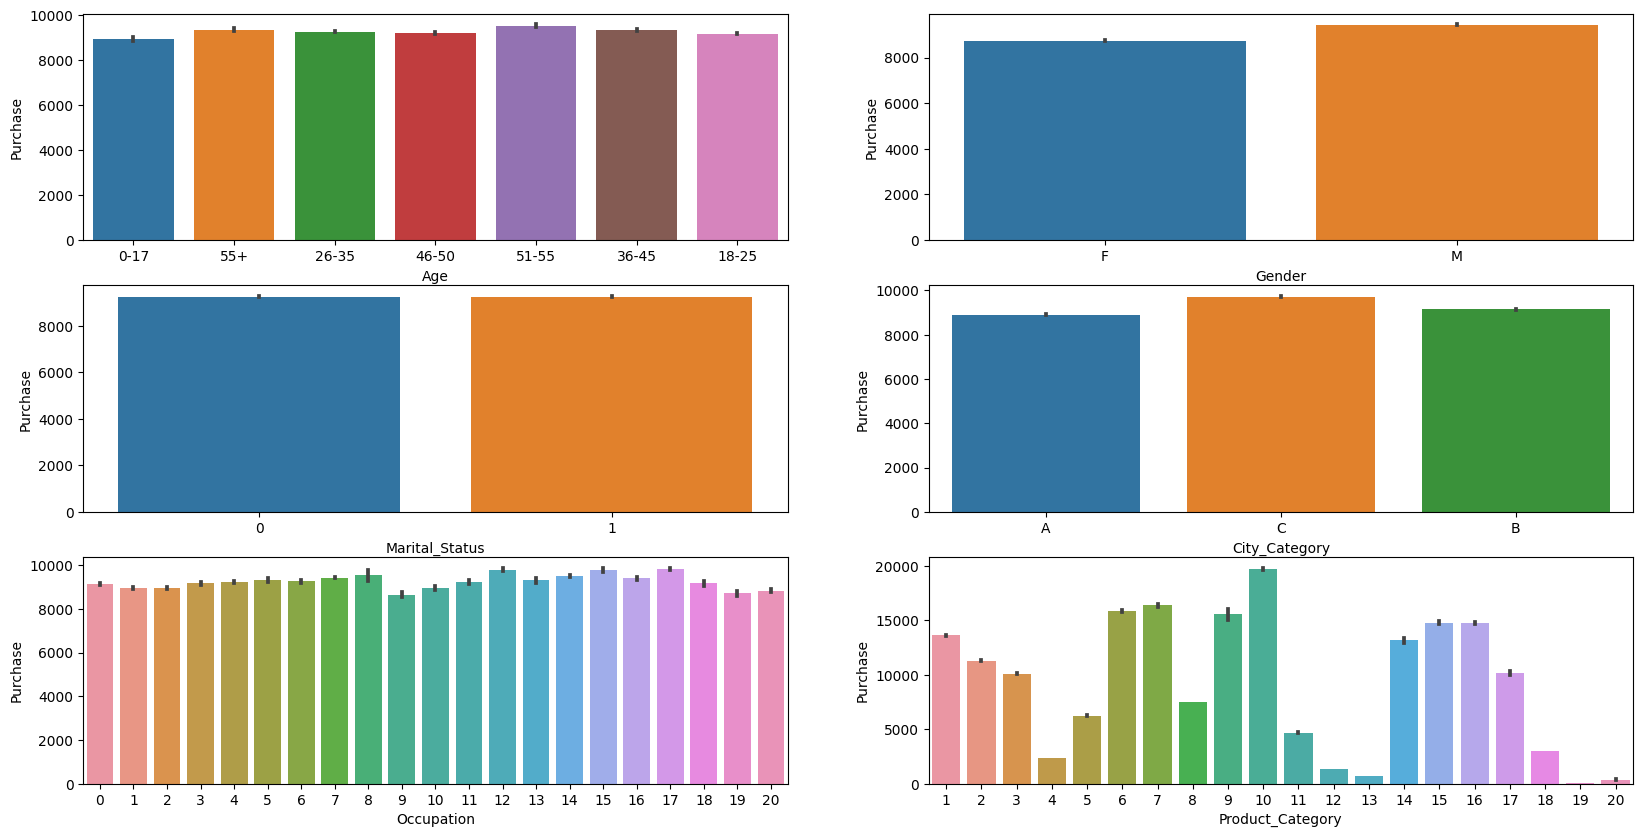

In [14]:
f,ax=plt.subplots(3,2,figsize=(20,10))
sns.barplot(ax=ax[0,0],data=df,x='Age',y='Purchase')
sns.barplot(ax=ax[0,1],data=df,x='Gender',y='Purchase')
sns.barplot(ax=ax[1,0],data=df,x='Marital_Status',y='Purchase')
sns.barplot(ax=ax[1,1],data=df,x='City_Category',y='Purchase')
sns.barplot(ax=ax[2,0],data=df,x='Occupation',y='Purchase')
sns.barplot(ax=ax[2,1],data=df,x='Product_Category',y='Purchase')
plt.show()

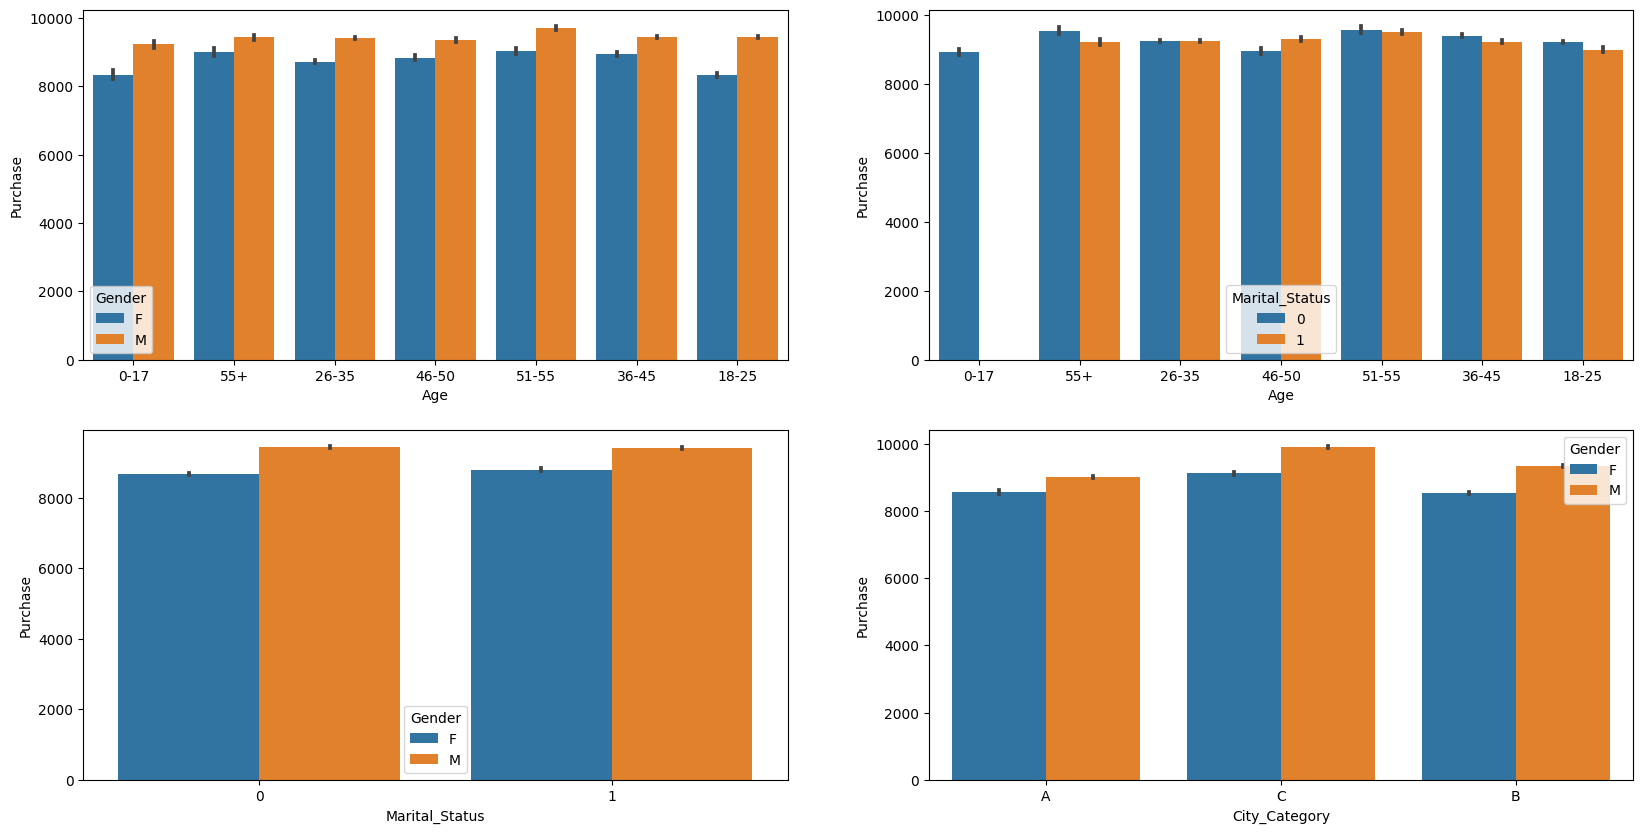

In [15]:
f,ax=plt.subplots(2,2,figsize=(20,10))
sns.barplot(ax=ax[0,0],data=df,x='Age',y='Purchase',hue='Gender')
sns.barplot(ax=ax[0,1],data=df,x='Age',y='Purchase',hue='Marital_Status')
sns.barplot(ax=ax[1,0],data=df,x='Marital_Status',y='Purchase',hue='Gender')
sns.barplot(ax=ax[1,1],data=df,x='City_Category',y='Purchase',hue='Gender')
plt.show()

In [16]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### Spending Analysis Based on Gender

In [17]:
mu_Male= np.mean(df[df['Gender']=='M']['Purchase'])
sigma_Male = np.std(df[df['Gender']=='M']['Purchase']) # population std
mu_Female= np.mean(df[df['Gender']=='F']['Purchase'])
sigma_Female = np.std(df[df['Gender']=='F']['Purchase']) # population std
mu_Male,sigma_Male,mu_Female,sigma_Female

(9437.526040472265, 5092.180063635943, 8734.565765155476, 4767.215738016988)

<Axes: xlabel='Purchase', ylabel='Count'>

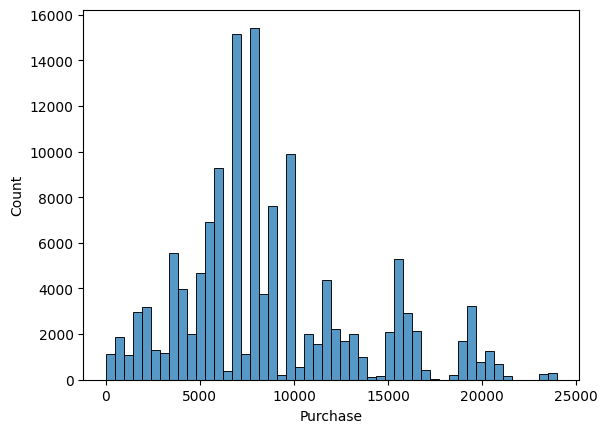

In [18]:
sns.histplot(df[df['Gender']=='F']['Purchase'],bins=50)

<Axes: xlabel='Purchase', ylabel='Count'>

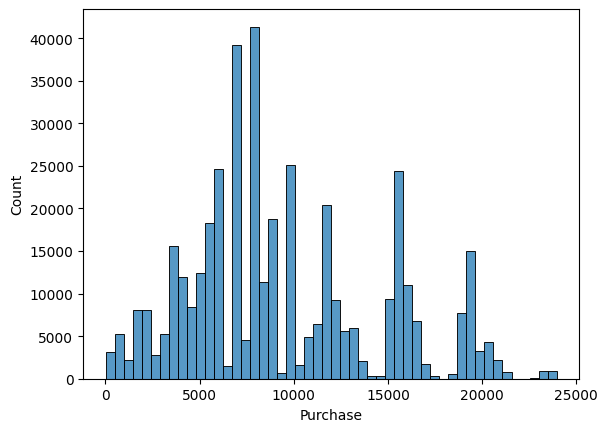

In [19]:
sns.histplot(df[df['Gender']=='M']['Purchase'],bins=50)

male customer are buying more than female for range between 10000 to 20000

#### Sampling

<Axes: ylabel='Count'>

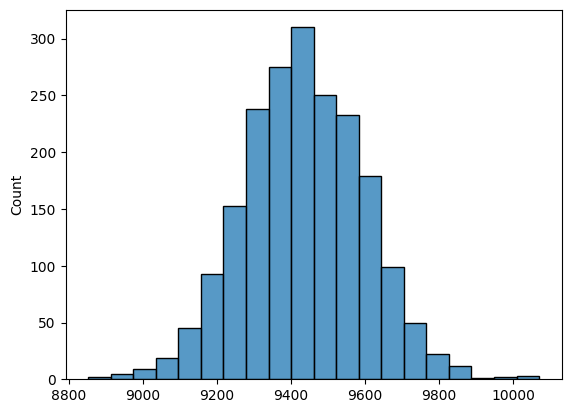

In [21]:
sample_means_M2, n = [], 1000
for reps in range(2000):
    bootstrapped_sample = np.random.choice(df[df['Gender']=='M']['Purchase'], size=n) 
    bootstrapped_mean = np.mean(bootstrapped_sample)
    sample_means_M2.append(bootstrapped_mean)
sns.histplot(sample_means_M2, bins=20)

<Axes: ylabel='Count'>

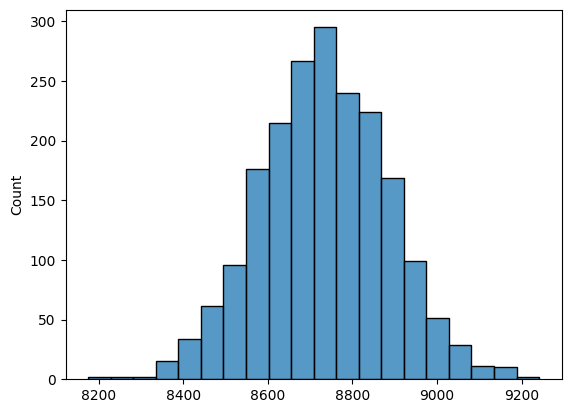

In [23]:
sample_means_F2, n = [], 1000
for reps in range(2000):
    bootstrapped_sample = np.random.choice(df[df['Gender']=='F']['Purchase'], size=n) 
    bootstrapped_mean = np.mean(bootstrapped_sample)
    sample_means_F2.append(bootstrapped_mean)
sns.histplot(sample_means_F2, bins=20)

In [24]:
print(np.mean(sample_means_M2), np.std(sample_means_M2), sigma_Male/np.sqrt(1000))
print(np.mean(sample_means_F2), np.std(sample_means_F2), sigma_Female/np.sqrt(1000))

9435.272336 162.31344087275428 161.0288725679074
8733.039133999999 151.2685493358221 150.75259829534235


In [25]:
# 99% confidence interval for survey-1,# 95% confidence interval for survey-1
print(np.percentile(sample_means_M2, [0.5, 99.5]),np.percentile(sample_means_M2, [2.5, 97.5]))
print(np.percentile(sample_means_F2, [0.5, 99.5]),np.percentile(sample_means_F2, [2.5, 97.5]))

[8997.37163 9854.10792] [9126.97565  9751.541025]
[8344.663225 9140.69665 ] [8435.3877  9032.50105]


### Insight

#### As mean purchase amount for male is more than Female so female are spending less than male
#### 95%,99% Confidence interval for Male purchase is [9113 - 9743 ] , [9034 - 9838]
#### 95%,99% Confidence interval for Female purchase is [8451 - 9032 , [8347 - 9121] 

#### 95% CI for male and female are not overlapping
#### 99% CI for male and female are overlapping and intersection range is 9034 to 9121
#### 95% CI is not overlapping and 99% CI is slightly overlapping so difference is not significant

### Spending Analysis Based on Gender

In [26]:
mu_MS0= np.mean(df[df['Marital_Status']==0]['Purchase'])
sigma_MS0 = np.std(df[df['Marital_Status']==0]['Purchase']) # std for unmarried person
mu_MS1= np.mean(df[df['Marital_Status']==1]['Purchase'])
sigma_MS1 = np.std(df[df['Marital_Status']==1]['Purchase']) # std for married person
mu_MS0,sigma_MS0,mu_MS1,sigma_MS1

(9265.907618921507, 5027.340117880186, 9261.174574082374, 5016.886245793184)

<Axes: xlabel='Purchase', ylabel='Count'>

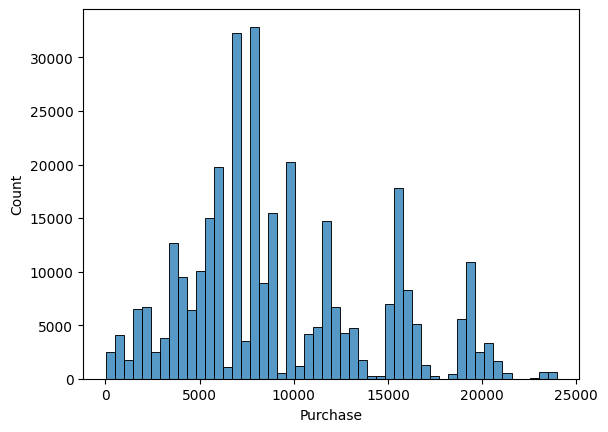

In [27]:
sns.histplot(df[df['Marital_Status']==0]['Purchase'],bins=50)

<Axes: xlabel='Purchase', ylabel='Count'>

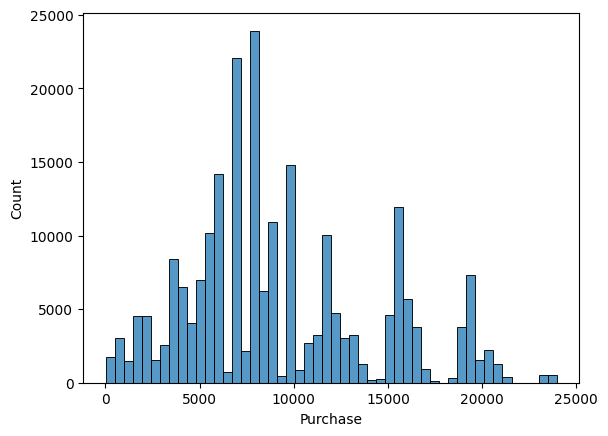

In [28]:
sns.histplot(df[df['Marital_Status']==1]['Purchase'],bins=50)

In [29]:
## Considering 1000 sample size

<Axes: ylabel='Count'>

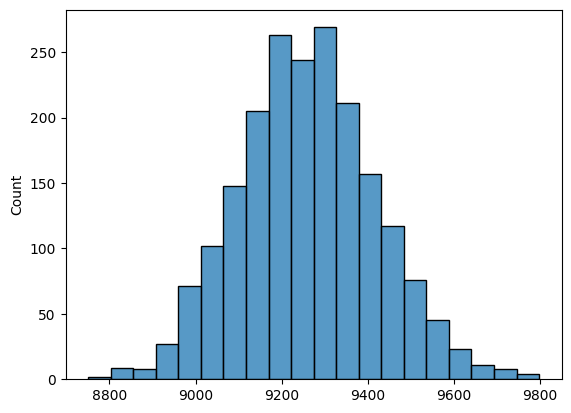

In [30]:
sample_means_MS1, n = [], 1000
for reps in range(2000):
    bootstrapped_sample = np.random.choice(df[df['Marital_Status']==1]['Purchase'], size=n) 
    bootstrapped_mean = np.mean(bootstrapped_sample)
    sample_means_MS1.append(bootstrapped_mean)
sns.histplot(sample_means_MS1, bins=20)

<Axes: ylabel='Count'>

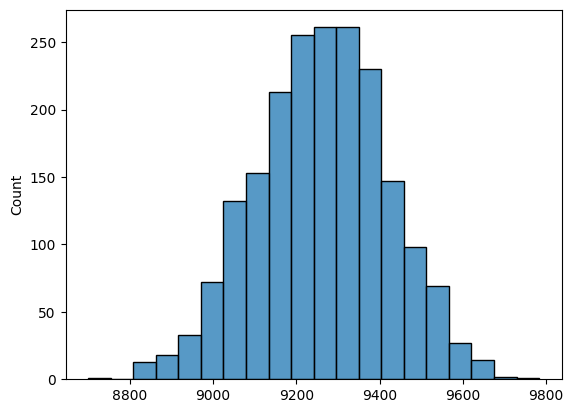

In [31]:
sample_means_MS0, n = [], 1000
for reps in range(2000):
    bootstrapped_sample = np.random.choice(df[df['Marital_Status']==0]['Purchase'], size=n) 
    bootstrapped_mean = np.mean(bootstrapped_sample)
    sample_means_MS0.append(bootstrapped_mean)
sns.histplot(sample_means_MS0, bins=20)

In [32]:
print(np.mean(sample_means_MS0),mu_MS0, np.std(sample_means_MS0), sigma_MS0/np.sqrt(1000))
print(np.mean(sample_means_MS1),mu_MS1, np.std(sample_means_MS1), sigma_MS1/np.sqrt(1000))

9261.721398 9265.907618921507 157.57899688464067 158.9784534484078
9260.088096000001 9261.174574082374 159.39894682070138 158.64787298677794


In [33]:
# 99% confidence interval for survey-1,# 95% confidence interval for survey-1
print(np.percentile(sample_means_MS0, [0.5, 99.5]),np.percentile(sample_means_MS0, [2.5, 97.5]))
print(np.percentile(sample_means_MS1, [0.5, 99.5]),np.percentile(sample_means_MS1, [2.5, 97.5]))

[8850.170555 9636.521725] [8950.374675 9561.771725]
[8854.253395 9694.462235] [8963.144275 9583.2593  ]


### Insight

#### 95%,99% Confidence interval for Married People purchase is [8950-9561] , [8850-9636]
#### 95%,99% Confidence interval for UnMarried People purchase is [8963-9583 ], [8854 - 9694] 

#### 95% and 99% CI for Married People and UnMarried People are overlapping
#### Marital Status has not much Impact on Purchase amount

### Spending analysis based on Age

In [90]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0,10,A,2,0,3,8370
1,1000001,P00248942,F,0,10,A,2,0,1,15200
2,1000001,P00087842,F,0,10,A,2,0,12,1422
3,1000001,P00085442,F,0,10,A,2,0,12,1057
4,1000002,P00285442,M,6,16,C,4+,0,8,7969


<Axes: xlabel='Age', ylabel='count'>

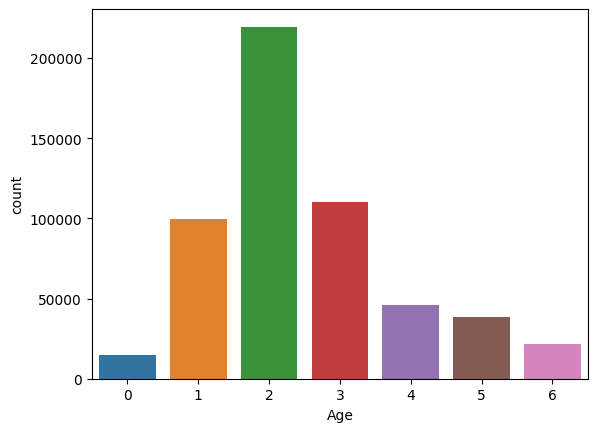

In [89]:
sns.countplot(data=df,x='Age')

In [34]:
## Considering 1000 sample size

In [36]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [85]:
df.replace({
    'Age': { '0-17':0, '55+':6, '26-35':2, '46-50':4, '51-55':5, '36-45':3, '18-25':1}
},inplace=True)

In [83]:
mean_purchase,std_purchase=[],[]
for i in range(7):
    mean_purchase.append(df[df['Age']==i]['Purchase'].mean())
    std_purchase.append(df[df['Age']==i]['Purchase'].std())
mean_purchase,std_purchase

([8933.464640444974,
  9169.663606261289,
  9252.690632869888,
  9331.350694917874,
  9208.625697468327,
  9534.808030960236,
  9336.280459449405],
 [5111.11404600277,
  5034.321997176577,
  5010.527303002927,
  5022.923879204652,
  4967.216367142921,
  5087.368079602116,
  5011.493995603418])

Age range between 0-17
sample mean= 8933.7344305 population mean= 8933.464640444974
sample std= 159.48998244973936 sigma= 161.6276176624738
99% CI= [8520.236075 9325.41108 ]
95% CI= [8613.3676   9253.005825]

Age range between 18-25
sample mean= 9165.9797605 population mean= 9169.663606261289
sample std= 158.1397220627099 sigma= 159.19923985765746
99% CI= [8748.750465 9570.43174 ]
95% CI= [8874.951475 9477.068725]

Age range between 26-35
sample mean= 9252.800627 population mean= 9252.690632869888
sample std= 161.17724786964777 sigma= 158.44678555949875
99% CI= [8855.93865  9648.878565]
95% CI= [8939.53905 9568.62325]

Age range between 36-45
sample mean= 9327.7546135 population mean= 9331.350694917874
sample std= 155.05913764614817 sigma= 158.83879971935167
99% CI= [8939.736355 9726.38897 ]
95% CI= [9022.298975 9633.646775]

Age range between 46-50
sample mean= 9199.604732000002 population mean= 9208.625697468327
sample std= 155.2164795937473 sigma= 157.07717351038792
99% CI= [8778.55

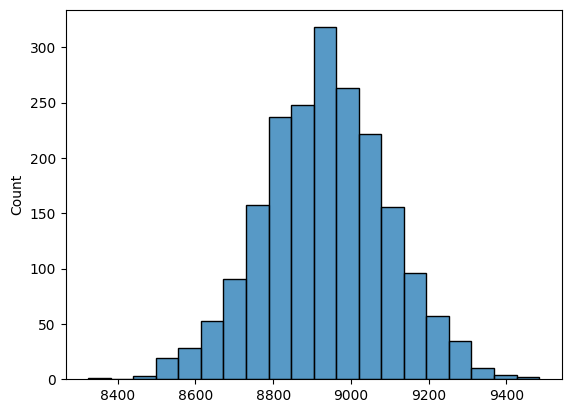

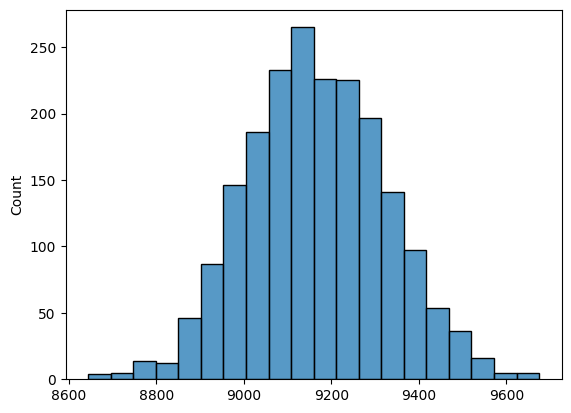

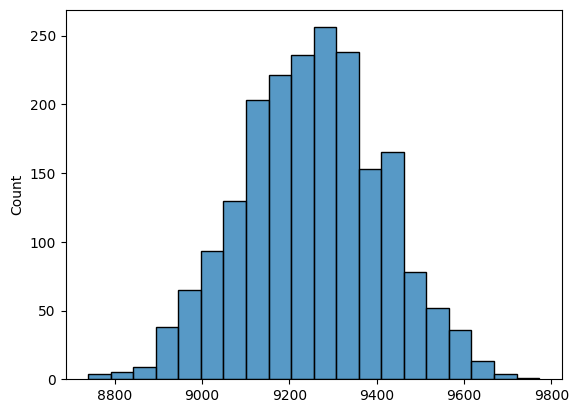

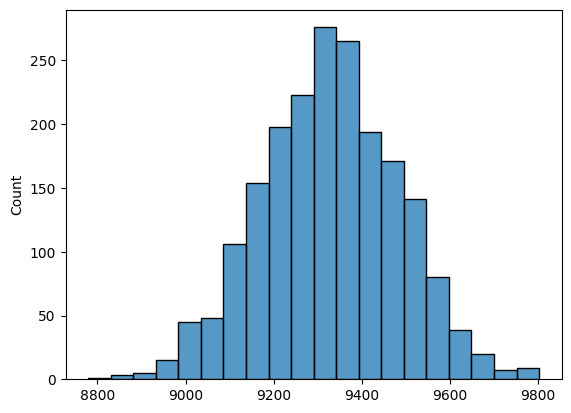

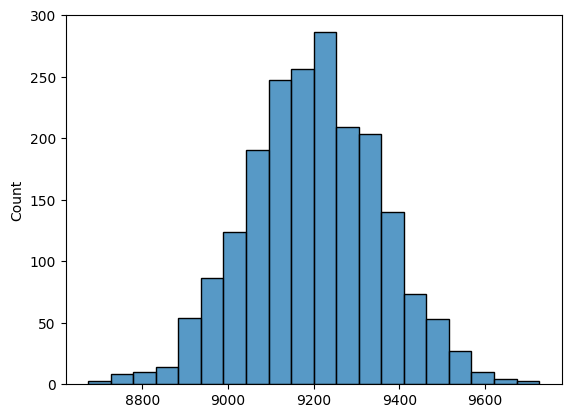

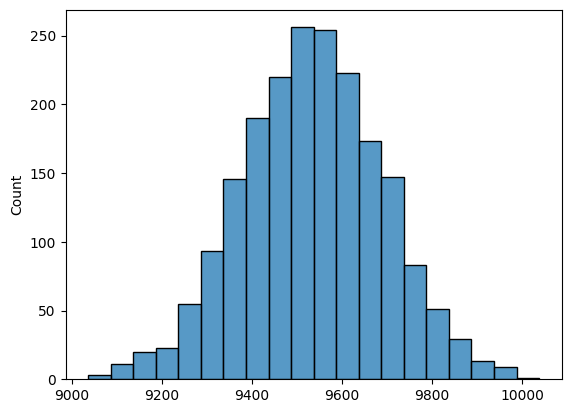

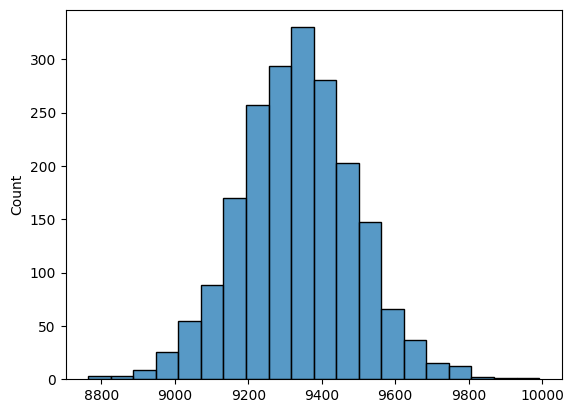

In [88]:
sample_means_Age, n = [], 1000
d={ '0-17':0, '55+':6, '26-35':2, '46-50':4, '51-55':5, '36-45':3, '18-25':1}
for i in range(7):
    for reps in range(2000):
        bootstrapped_sample = np.random.choice(df[df['Age']==i]['Purchase'], size=n) 
        bootstrapped_mean = np.mean(bootstrapped_sample)
        sample_means_Age.append(bootstrapped_mean)
    plt.figure(i)
    sns.histplot(sample_means_Age, bins=20) 
    keys = [k for k, v in d.items() if v == i]
    print('Age range between',keys[0])
    print('sample mean=',np.mean(sample_means_Age),'population mean=',mean_purchase[i])
    print('sample std=', np.std(sample_means_Age),'sigma=', std_purchase[i]/np.sqrt(1000))
    print('99% CI=',np.percentile(sample_means_Age, [0.5, 99.5]))
    print('95% CI=',np.percentile(sample_means_Age, [2.5, 97.5]))
    print()
    sample_means_Age=[]
plt.show()

### Analysis based on Product category 

<Axes: xlabel='Product_Category', ylabel='count'>

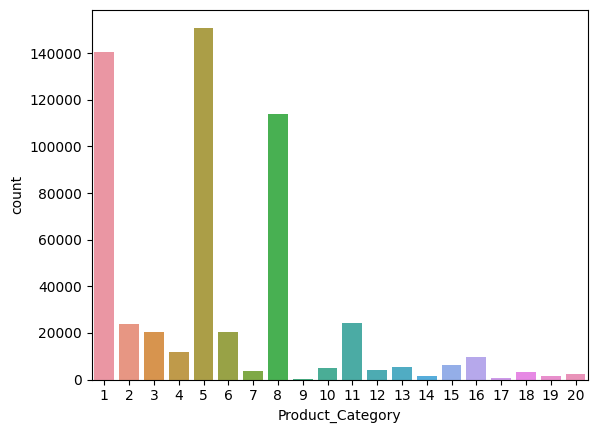

In [91]:
sns.countplot(data=df,x='Product_Category')

### Recommendations

#### Female are buying less for purchase range 10000 to 20000 we should release new product on that range for female.
#### For every walmart store must have product category 1,5,8 in stock because these category product are in high demand.
#### If this data is working for walmart then walmart has more number of customer in the age between 26-35 in comparision with other age range and should focus on customer having age greater than 46
#### walmart has 25% female customer so they should focus on female customer acquisition